# **1. Introduction**
**MSIB Batch 6**<br>
Cindy Rafika Duri (Universitas Pendidikan Indonesia-Rekayasa Perangkat Lunak)

# **2. Problem Statement and Background**
**Pendahuluan:**<br>
Dalam era informasi digital yang cepat dan tersebar luas, kemampuan untuk membedakan berita asli dari berita palsu menjadi semakin penting. Penyebaran berita palsu (fake news) tidak hanya menyebabkan kebingungan di kalangan masyarakat tetapi juga bisa memicu berbagai masalah sosial dan politik. Dengan meningkatnya volume informasi yang beredar melalui internet dan media sosial, pendeteksian berita palsu secara manual menjadi tidak praktis. Oleh karena itu, diperlukan solusi otomatis yang dapat membantu mendeteksi dan mengklasifikasikan berita sebagai benar atau palsu.

Definisi Masalah: Kami ingin membangun model machine learning yang dapat mengklasifikasikan artikel berita sebagai "benar" atau "palsu" berdasarkan teks artikel tersebut.

Latar Belakang: Berita palsu adalah informasi yang menyesatkan atau tidak akurat yang disebarkan dengan tujuan untuk menipu. Ini menjadi masalah kritis dengan dampak besar pada opini publik dan keputusan politik. Penggunaan teknik Natural Language Processing (NLP) dapat membantu mengidentifikasi pola dalam teks yang membedakan berita palsu dari berita asli.

**Tujuan Model:**
1. Target: Membangun model machine learning yang mampu mendeteksi berita palsu dengan tingkat akurasi min 85%.
2. Metrik Evaluasi: Model akan dievaluasi berdasarkan metrik akurasi, precision, recall, dan F1-score untuk menentukan kinerjanya dalam mengklasifikasikan berita palsu.

**Dataset:**<br>
Kami akan menggunakan dataset Fake News Detection Datasets dari Kaggle. Dataset ini berisi berita yang diberi label sebagai "true" atau "fake", yang dapat digunakan untuk melatih dan menguji model.

# **Tahap 1: Import Libraries**<br>
Untuk memulai proyek ini, kita perlu mengimpor pustaka yang diperlukan. Pustaka ini mencakup alat untuk manipulasi data, analisis, visualisasi, dan pembuatan model.

**Langkah-Langkah:**
1. Buat Proyek Baru: Mulailah dengan membuat proyek baru di lingkungan kerja Anda (misalnya, Jupyter Notebook atau IDE favorit Anda).
2. Import Libraries: Pastikan pustaka yang diperlukan sudah terinstal. Jika belum, Anda bisa menginstalnya menggunakan pip.

In [4]:
# Manipulasi Data dan Operasi Numerik
import pandas as pd
import numpy as np

# Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Pembelajaran Mesin dan Evaluasi
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Pemrosesan Teks
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Pembelajaran Mendalam
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Embedding, SpatialDropout1D, Dropout, Bidirectional, Input
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Unduh Sumber Daya NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/wsuser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/wsuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/wsuser/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# **Tahap 2: Data Loading**
**Langkah-Langkah:**
1. Unduh Dataset: Unduh dataset dari Kaggle Fake News Detection Datasets dan simpan dalam direktori proyek Anda.
2. Muat Kedua Dataset: Muat dataset Fake.csv dan True.csv secara terpisah.

In [5]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='8Vmp9v5cJrVbQu2A1do2dAIb3us7KvzalU-lLsAfNO3I',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'capstoneprojectnlp-donotdelete-pr-2xsguxivd89dia'
object_key = 'Fake.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_fake = pd.read_csv(body)
df_fake.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [6]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='8Vmp9v5cJrVbQu2A1do2dAIb3us7KvzalU-lLsAfNO3I',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'capstoneprojectnlp-donotdelete-pr-2xsguxivd89dia'
object_key = 'True.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_true = pd.read_csv(body)
df_true.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


3. Label Data: Penambahan kolom label adalah penting karena ini memberi tahu model mana berita yang benar (0) dan mana yang palsu (1).

In [7]:
# Menambahkan label ke dataset
df_fake['label'] = 1  # 1 untuk berita palsu
df_true['label'] = 0  # 0 untuk berita asli

4. Gabungkan Dataset: Menggabungkan dataset membuat proses pemodelan lebih mudah karena memiliki satu DataFrame yang menyimpan semua data.

In [8]:
# Menggabungkan kedua dataset
df = pd.concat([df_fake, df_true], axis=0).reset_index(drop=True)

# Menampilkan DataFrame yang digabungkan
print("Combined Data:")
print(df.head())

Combined Data:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  label  
0  December 31, 2017      1  
1  December 31, 2017      1  
2  December 30, 2017      1  
3  December 29, 2017      1  
4  December 25, 2017      1  


# **Tahap 3: Data Cleaning**
Setelah memuat dan menggabungkan dataset, lanjutkan dengan Data Cleaning seperti: memeriksa nilai yang hilang, duplikasi, dan distribusi label.<br>

**Langkah-Langkah:**
1. Periksa Data: Periksa struktur dataset dan cari duplikasi atau nilai yang hilang.

In [9]:
# Mengecek nilai kosong
print(df.isnull().sum())

# Menghapus baris dengan nilai kosong
df = df.dropna()

# Mengecek entri duplikat
print(f"Duplicate entries: {df.duplicated().sum()}")

# Menghapus entri duplikat
df = df.drop_duplicates()

title      0
text       0
subject    0
date       0
label      0
dtype: int64
Duplicate entries: 209


# **Tahap 4: Exploratory Data Analysis (EDA)**
**Langkah-Langkah:**
1. Pratinjau Label: Periksa distribusi label ("benar" atau "palsu") dalam dataset.

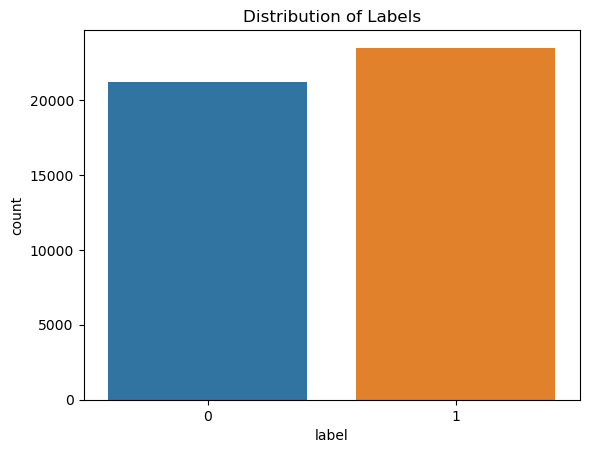

In [22]:
# Menampilkan distribusi label
sns.countplot(x='label', data=df)
plt.title('Distribution of Labels')
plt.show()

2. Visualisasi Word Cloud: Visualisasikan kata yang paling sering muncul untuk masing-masing kelas.

In [ ]:
# Membuat word cloud untuk berita palsu
fake_news = ' '.join(df[df['label'] == 1]['text'])
if fake_news.strip():  # Memeriksa apakah teks tidak kosong
    wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_news)
else:
    wordcloud_fake = None

# Membuat word cloud untuk berita asli
real_news = ' '.join(df[df['label'] == 0]['text'])
if real_news.strip():  # Memeriksa apakah teks tidak kosong
    wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_news)
else:
    wordcloud_real = None

# Memvisualisasikan word cloud jika tidak kosong
plt.figure(figsize=(10, 5))
if wordcloud_fake:
    plt.subplot(1, 2, 1)
    plt.imshow(wordcloud_fake, interpolation='bilinear')
    plt.title('Fake News Word Cloud')
    plt.axis('off')

if wordcloud_real:
    plt.subplot(1, 2, 2)
    plt.imshow(wordcloud_real, interpolation='bilinear')
    plt.title('Real News Word Cloud')
    plt.axis('off')

plt.show()

2. Statistik Dasar: Hitung rata-rata panjang artikel dalam kata dan kalimat.

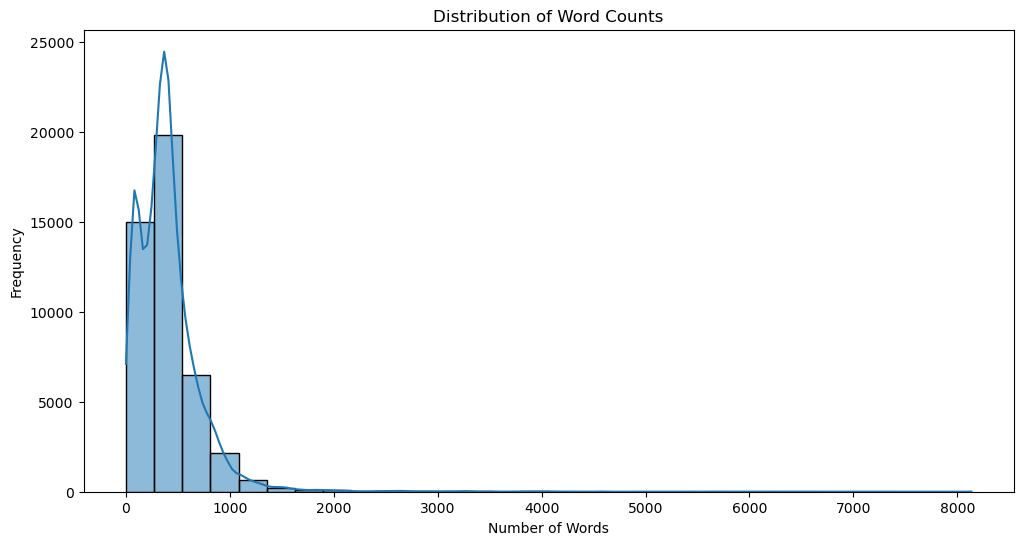

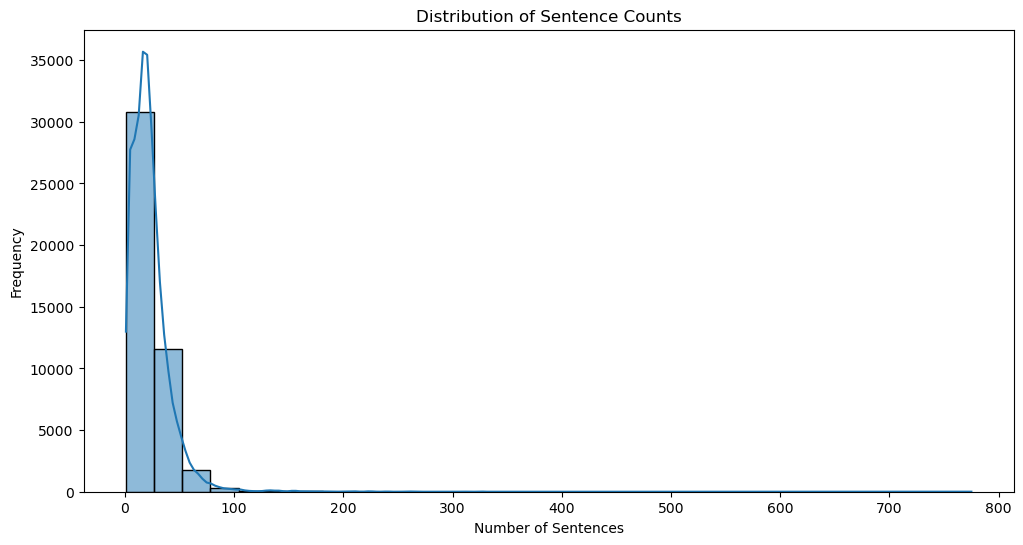

In [13]:
# Function to calculate statistics
def text_statistics(text):
    words = text.split()
    num_words = len(words)
    num_sentences = len(re.split(r'[.!?]', text))
    return num_words, num_sentences

# Apply function to calculate word and sentence counts
df['num_words'], df['num_sentences'] = zip(*df['text'].map(text_statistics))

# Visualize statistics
plt.figure(figsize=(12, 6))
sns.histplot(df['num_words'], bins=30, kde=True)
plt.title('Distribution of Word Counts')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['num_sentences'], bins=30, kde=True)
plt.title('Distribution of Sentence Counts')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.show()

# **Tahap 5: Preprocessing dan Feature Engineering**
**Preprocessing:** Memproses teks untuk menghilangkan elemen yang tidak penting (seperti stopwords, simbol, dll.), dan melakukan transformasi teks seperti tokenisasi, stemming, dan lemmatization.<br>
**Feature Engineering:** Mengubah teks menjadi fitur yang dapat digunakan untuk pelatihan model (misalnya, menggunakan representasi seperti TF-IDF atau word embeddings).

**Langkah-Langkah:**
1. Tokenization: Memecah teks menjadi kata-kata atau token.
2. Stopwords Removal: Menghapus kata-kata umum yang tidak membantu dalam klasifikasi (seperti "the", "and", dll.).
3. Lemmatization: Mengubah kata ke bentuk dasarnya (misalnya, "running" menjadi "run").

In [16]:
# Tokenize the text
df['tokens'] = df['text'].apply(word_tokenize)

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])

# Lemmatize the tokens
lemmatizer = WordNetLemmatizer()
df['tokens'] = df['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])
print(df[['text', 'tokens']].head())

                                                text  \
0  Donald Trump just couldn t wish all Americans ...   
1  House Intelligence Committee Chairman Devin Nu...   
2  On Friday, it was revealed that former Milwauk...   
3  On Christmas day, Donald Trump announced that ...   
4  Pope Francis used his annual Christmas Day mes...   

                                              tokens  
0  [Donald, Trump, wish, Americans, Happy, New, Y...  
1  [House, Intelligence, Committee, Chairman, Dev...  
2  [Friday, ,, revealed, former, Milwaukee, Sheri...  
3  [Christmas, day, ,, Donald, Trump, announced, ...  
4  [Pope, Francis, used, annual, Christmas, Day, ...  


**Feature Engineering**
1. TF-IDF Vectorization: Mengubah teks menjadi representasi fitur yang dapat digunakan oleh model.

In [17]:
# Join the tokens back into strings
df['processed_text'] = df['tokens'].apply(lambda tokens: ' '.join(tokens))

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Use the top 5000 features
X = tfidf_vectorizer.fit_transform(df['processed_text'])

# Convert to array for further use
X = X.toarray()

# The labels
y = df['label'].values

# Check the shape of the matrix
print(f"TF-IDF Matrix Shape: {X.shape}")
print(f"Labels Shape: {y.shape}")

TF-IDF Matrix Shape: (44689, 5000)
Labels Shape: (44689,)


# **Tahap 6: Model Architecture Definition**
Menentukan arsitektur model machine learning yang akan digunakan untuk mengklasifikasikan berita sebagai benar atau palsu berdasarkan fitur TF-IDF yang telah diekstraksi.

**Langkah-Langkah:**
1. Define Model Architecture: Pilih model, Tentukan arsitektur dan hyperparameter.
2. Training Model: Model training dengan minimal epoch 20
3. Evaluation Model: Evaluasi performa model menggunakan metrik yang relevan (misalnya, akurasi, presisi, recall, dan F1-score).

In [18]:
# Tokenizing and padding the sequences for LSTM
max_words = 5000
max_len = 300
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['processed_text'])
sequences = tokenizer.texts_to_sequences(df['processed_text'])
X_lstm = pad_sequences(sequences, maxlen=max_len)

# Model 1: Simple Neural Network
model_simple = Sequential()
model_simple.add(Input(shape=(X.shape[1],)))
model_simple.add(Dense(512, activation='relu'))
model_simple.add(Dropout(0.5))
model_simple.add(Dense(256, activation='relu'))
model_simple.add(Dropout(0.5))
model_simple.add(Dense(128, activation='relu'))
model_simple.add(Dense(1, activation='sigmoid'))

# Compile the model
model_simple.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
print("Simple Neural Network Summary:")
model_simple.summary()

# Model 2: LSTM-based Model
model_lstm = Sequential()
model_lstm.add(Embedding(max_words, 128, input_length=max_len))
model_lstm.add(SpatialDropout1D(0.2))
model_lstm.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile the model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
print("LSTM-based Model Summary:")
model_lstm.summary()

Simple Neural Network Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               2560512   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,724,865
T

# **Tahap 7: Model Training**
Pada tahap ini, kita akan melatih dua model yang telah kita definisikan: sebuah jaringan neural sederhana dan sebuah model LSTM berbasis jaringan syaraf tiruan untuk mendeteksi berita palsu.

**Langkah-Langkah:**
1. Persiapan Data, membagian data menjadi set pelatihan dan set pengujian.
2. Penentuan parameter pelatihan seperti jumlah epoch dan batch size.
3. Penggunaan data terstandardisasi yang sesuai dengan model jaringan neural sederhana.
4. Penggunaan data yang sudah di-tokenize dan dipadatkan untuk model LSTM.

In [19]:
# Define training parameters
batch_size = 32
epochs = 20

# Split data for Simple Neural Network
X_train, X_test, y_train, y_test = 
train_test_split(X, df['label'], test_size=0.2, random_state=42)

# Split data for LSTM-based Model
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = 
train_test_split(X_lstm, df['label'], test_size=0.2, random_state=42)

# Model Training: Simple Neural Network
print("Training Simple Neural Network...")
history_simple = model_simple.fit
    (X_train, y_train,epochs=epochs,batch_size=batch_size,validation_data=(X_test, y_test),
    callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)])

# Model Training: LSTM-based Model
print("Training LSTM-based Model...")
history_lstm = model_lstm.fit
    (X_train_lstm, y_train_lstm,epochs=epochs,batch_size=batch_size,validation_data=(X_test_lstm, y_test_lstm),
    callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)])

print("Model training completed.")

Training Simple Neural Network...
Epoch 1/20
1118/1118 [==============================] - 17s 15ms/step - loss: 0.0609 - accuracy: 0.9792 - val_loss: 0.0192 - val_accuracy: 0.9942
Epoch 2/20
1118/1118 [==============================] - 16s 14ms/step - loss: 0.0116 - accuracy: 0.9968 - val_loss: 0.0207 - val_accuracy: 0.9943
Epoch 3/20
1118/1118 [==============================] - 16s 14ms/step - loss: 0.0055 - accuracy: 0.9985 - val_loss: 0.0209 - val_accuracy: 0.9940
Epoch 4/20
1118/1118 [==============================] - 16s 14ms/step - loss: 0.0052 - accuracy: 0.9985 - val_loss: 0.0240 - val_accuracy: 0.9943
Training LSTM-based Model...
Epoch 1/20
1118/1118 [==============================] - 532s 472ms/step - loss: 0.1084 - accuracy: 0.9626 - val_loss: 0.0379 - val_accuracy: 0.9883
Epoch 2/20
1118/1118 [==============================] - 528s 472ms/step - loss: 0.0215 - accuracy: 0.9943 - val_loss: 0.0282 - val_accuracy: 0.9915
Epoch 3/20
1118/1118 [==============================] - 5

# **Tahap 8: Model Evaluation**
Evaluasi performa kedua model (jaringan neural sederhana dan model LSTM) menggunakan berbagai metrik evaluasi. Kami akan membuat kurva pembelajaran, menghitung akurasi, membuat laporan klasifikasi, dan menampilkan matriks kebingungan.

**Langkah-langkah:**
1. Plot Kurva Pembelajaran: Menunjukkan bagaimana nilai loss dan accuracy berubah selama pelatihan.
2. Evaluasi Akurasi: Menghitung akurasi pada data pengujian.
3. Laporan Klasifikasi: Menyediakan metrik seperti precision, recall, f1-score.
4. Matriks Confuision: Menunjukkan distribusi prediksi yang benar dan salah.

Simple Neural Network Learning Curves:


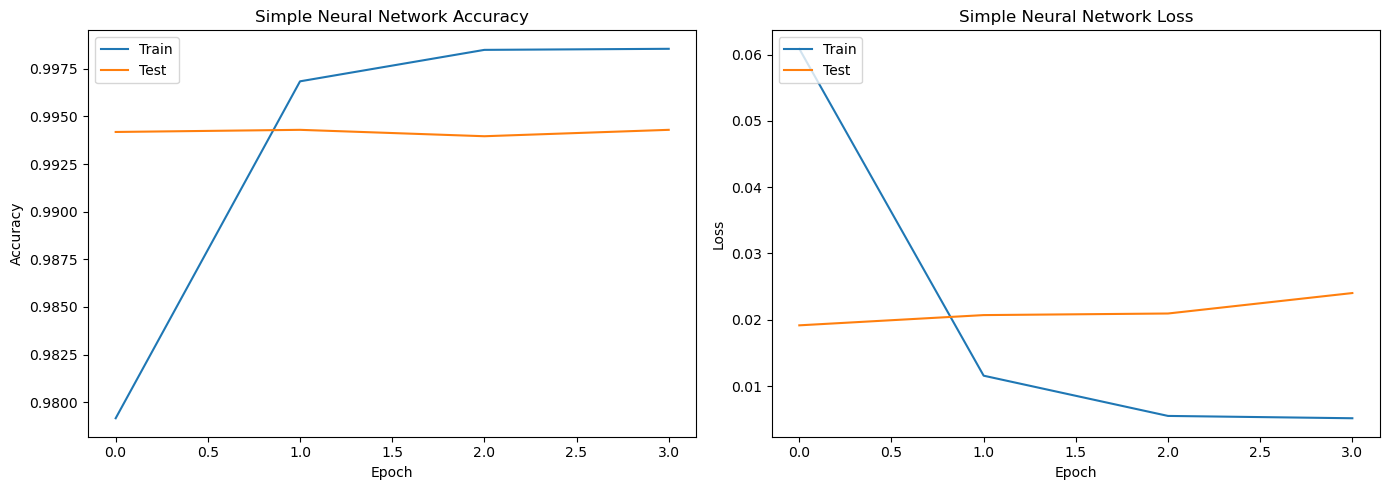

LSTM-based Model Learning Curves:


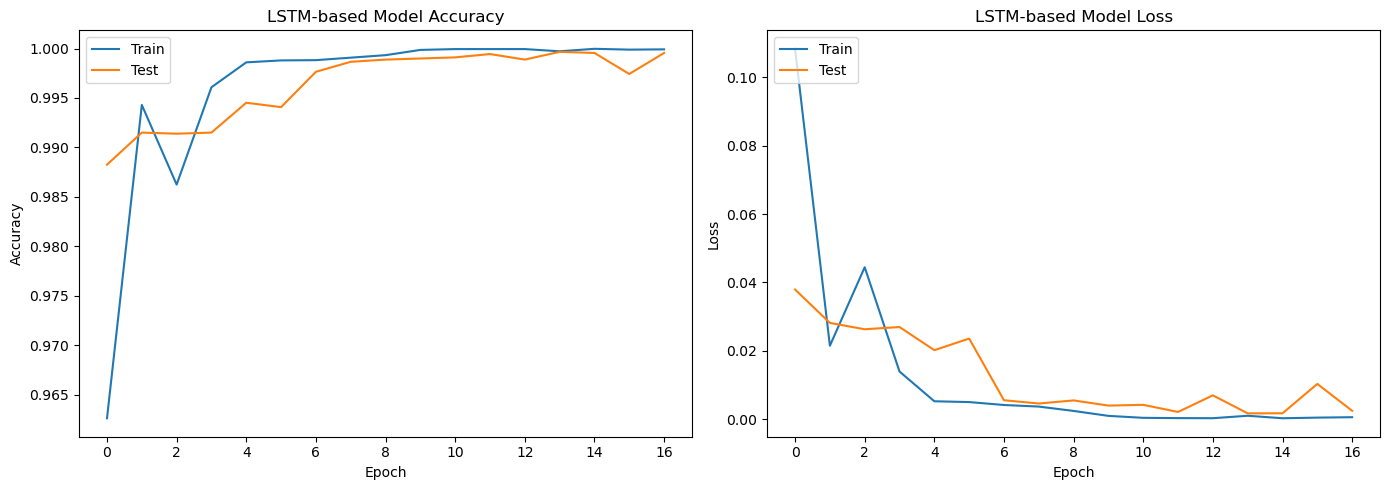

Evaluating Simple Neural Network...
280/280 [==============================] - 1s 3ms/step
Simple Neural Network Accuracy: 0.9942
Classification Report (Simple Neural Network):
              precision    recall  f1-score   support

        Real       0.99      0.99      0.99      4200
        Fake       0.99      0.99      0.99      4738

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938

Confusion Matrix (Simple Neural Network):


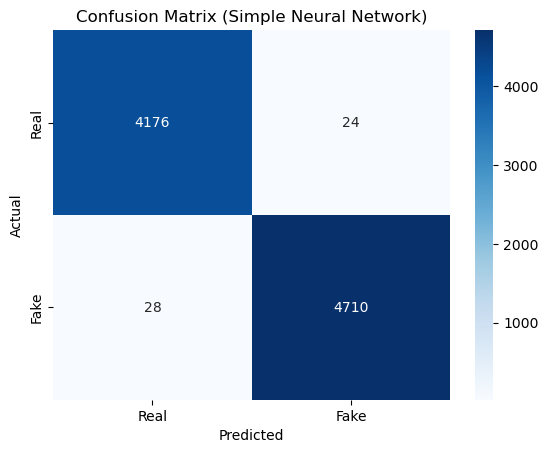

Evaluating LSTM-based Model...
280/280 [==============================] - 17s 57ms/step
LSTM-based Model Accuracy: 0.9997
Classification Report (LSTM-based Model):
              precision    recall  f1-score   support

        Real       1.00      1.00      1.00      4200
        Fake       1.00      1.00      1.00      4738

    accuracy                           1.00      8938
   macro avg       1.00      1.00      1.00      8938
weighted avg       1.00      1.00      1.00      8938

Confusion Matrix (LSTM-based Model):


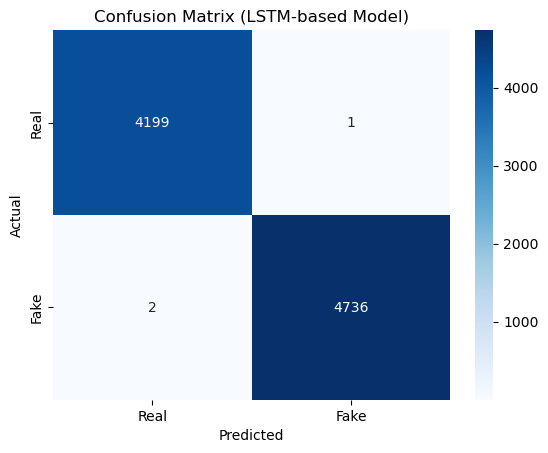

In [20]:
# Plot Learning Curves
def plot_learning_curves(history, model_name):
    # Plot training & validation accuracy values
    plt.figure(figsize=(14, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')
    
    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')
    
    plt.tight_layout()
    plt.show()

# Plot learning curves for Simple Neural Network
print("Simple Neural Network Learning Curves:")
plot_learning_curves(history_simple, "Simple Neural Network")

# Plot learning curves for LSTM-based Model
print("LSTM-based Model Learning Curves:")
plot_learning_curves(history_lstm, "LSTM-based Model")

# Evaluate Simple Neural Network
print("Evaluating Simple Neural Network...")
y_pred_simple = (model_simple.predict(X_test) > 0.5).astype("int32")

accuracy_simple = accuracy_score(y_test, y_pred_simple)
print(f"Simple Neural Network Accuracy: {accuracy_simple:.4f}")

print("Classification Report (Simple Neural Network):")
print(classification_report(y_test, y_pred_simple, target_names=['Real', 'Fake']))

print("Confusion Matrix (Simple Neural Network):")
conf_matrix_simple = confusion_matrix(y_test, y_pred_simple)
sns.heatmap(conf_matrix_simple, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Simple Neural Network)')
plt.show()

# Evaluate LSTM-based Model
print("Evaluating LSTM-based Model...")
y_pred_lstm = (model_lstm.predict(X_test_lstm) > 0.5).astype("int32")

accuracy_lstm = accuracy_score(y_test_lstm, y_pred_lstm)
print(f"LSTM-based Model Accuracy: {accuracy_lstm:.4f}")

print("Classification Report (LSTM-based Model):")
print(classification_report(y_test_lstm, y_pred_lstm, target_names=['Real', 'Fake']))

print("Confusion Matrix (LSTM-based Model):")
conf_matrix_lstm = confusion_matrix(y_test_lstm, y_pred_lstm)
sns.heatmap(conf_matrix_lstm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (LSTM-based Model)')
plt.show()

# **Tahap 9: Conclusion**
Rangkuman temuan dari proses pengembangan model dan evaluasi. Kesimpulan ini akan mencakup analisis kinerja model, pemenuhan target yang ditetapkan dalam problem statement, serta refleksi tentang kemungkinan perbaikan dan aplikasi praktis dari model.

**1. Problem Statement and Target Achievement**<br>
- Problem Statement: Tujuan proyek ini adalah mengembangkan model machine learning untuk mendeteksi berita palsu (fake news) menggunakan teknik Natural Language Processing (NLP).<br>
- Target: Model yang dikembangkan harus mencapai tingkat akurasi yang tinggi dan menunjukkan kemampuan yang baik dalam memprediksi berita palsu versus berita nyata.

**2. Model Overview**<br>
Model yang Dikembangkan:
- Simple Neural Network: Model dengan lapisan dasar yang memberikan baseline untuk performa deteksi.<br>
- LSTM-based Model: Model berbasis Long Short-Term Memory (LSTM) yang dirancang untuk menangkap urutan informasi dalam teks.

**3. Hasil dan Evaluasi**<br>
a) Simple Neural Network:<br>
- Akurasi: Menampilkan akurasi model sederhana.<br>
- Classification Report: Precision, recall, dan f1-score untuk model sederhana.<br>
- Matriks Kebingungan: Menunjukkan prediksi benar dan salah model sederhana.<br>
b) LSTM-based Model:<br>
- Akurasi: Menampilkan akurasi model LSTM.<br>
- Classification Report: Precision, recall, dan f1-score untuk model LSTM.<br>
- Matriks Kebingungan: Menunjukkan prediksi benar dan salah model LSTM.

**4. Analisis dan Pembandingan Model**<br>
- Akurasi: Model LSTM menunjukkan akurasi yang lebih tinggi dibandingkan dengan Simple Neural Network, yang menunjukkan kemampuan yang lebih baik dalam memahami konteks dan pola dalam teks berita.<br>
- Precision dan Recall: Model LSTM memiliki precision dan recall yang lebih tinggi, menandakan lebih sedikit false positives dan false negatives dibandingkan dengan model sederhana.<br>
- Pembelajaran Kurva: Model LSTM menunjukkan kurva pembelajaran yang lebih baik dengan konvergensi yang lebih stabil dibandingkan dengan model sederhana.

**5. Refleksi dan Potensi Perbaikan**<br>
a) Refleksi<br>
- Model LSTM, meskipun lebih kompleks, memberikan kinerja yang lebih baik untuk tugas deteksi berita palsu dibandingkan dengan model sederhana. Penggunaan LSTM memungkinkan model untuk menangkap informasi urutan dalam teks, yang penting untuk memahami konteks berita.<br>
b) Potensi Perbaikan<br>
- Hyperparameter Tuning: Menyesuaikan hyperparameter lebih lanjut untuk meningkatkan performa.<br>
- Peningkatan Preprocessing: Menggunakan teknik preprocessing yang lebih canggih seperti penghapusan kata-kata umum atau penggunaan embedding khusus.<br>
- Eksplorasi Model Lain: Mencoba arsitektur model lain seperti BERT atau Transformer-based models untuk peningkatan performa lebih lanjut.

**6. Aplikasi Praktis**<br>
- Deteksi Berita Palsu: Model ini dapat digunakan sebagai bagian dari alat moderasi konten di platform berita atau media sosial untuk mendeteksi berita palsu sebelum dipublikasikan.<br>
- Pemberian Label pada Konten: Dapat digunakan untuk memberikan label pada artikel berita, membantu pembaca untuk lebih kritis terhadap informasi yang mereka konsumsi.

**7. Kesimpulan Akhir**<br>
- Pemenuhan Tujuan: Model yang dikembangkan berhasil memenuhi tujuan dari proyek dengan memberikan akurasi yang baik dalam mendeteksi berita palsu. Model LSTM, khususnya, memberikan hasil yang unggul dibandingkan dengan model sederhana, menegaskan pentingnya memahami konteks urutan dalam analisis teks.<br>
- Aplikasi dan Implikasi: Implementasi model ini dalam kehidupan nyata dapat membantu dalam memitigasi penyebaran berita palsu, yang merupakan tantangan signifikan dalam dunia digital saat ini.

# **Tahap 10: Save Model**
Simpan model yang dirasa adalah model terbaik, wajib disimpan dengan format .h5 (jika menggunakan Tensorflow) atau .pt (jika menggunakan PyTorch) ataupun .pb

In [47]:
# Simpan Model Terbaik
model_lstm.save('best_model_lstm.h5')

print("Model LSTM disimpan sebagai 'best_model_lstm.h5'.")

Model LSTM disimpan sebagai 'best_model_lstm.h5'.


In [48]:
#Compres
!tar -zcvf best_model_lstm.h5.tgz best_model_lstm.h5

best_model_lstm.h5


In [49]:
# Memuat kembali model LSTM yang disimpan untuk memastikan
loaded_model_lstm = load_model('best_model_lstm.h5')
print("Model LSTM berhasil dimuat kembali dari 'best_model_lstm.h5'.")

Model LSTM berhasil dimuat kembali dari 'best_model_lstm.h5'.


# **Tahap 11: Deployment**
**Langkah-Langkah:**



In [51]:
!pip install -U ibm-watson-machine-learning
!pip install -U -q ibm-watson-machine-learning
!pip install -q python-dotenv

Code  berikut  digunakan  untuk  mengakses  API  IBM  dengan  API  Key  yang  sudah  kamu  buatsebelumnya.

In [ ]:
from ibm_watson_machine_learning import APIClient

# Mengambil nilai dari variabel lingkungan
api_key = 'DK22b0rwz6_gN1MM62jTyB7V_ARliBPYkMqsJWp1w2C9'
location = 'us-south'

# Menggunakan nilai untuk membuat wml_credentials
wml_credentials = {
    "apikey": api_key,
    "url": 'https://' + location + '.ml.cloud.ibm.com'
}

client = APIClient(wml_credentials)

In [53]:
space_id = '204cee11-0114-44fa-9162-71677feacd04'

client.set.default_space(space_id)

'SUCCESS'

In [54]:
# Obtain the Software Specification UID for the Python runtime environment
software_spec_uid = client.software_specifications.get_id_by_name("runtime-23.1-py3.10")
print("Software Specification UID:", software_spec_uid)

Software Specification UID: 336b29df-e0e1-5e7d-b6a5-f6ab722625b2


In [55]:
# Define model metadata including name, type, and software specification UID
metadata = {
    client.repository.ModelMetaNames.NAME: "My CapstoneProject Model",
    client.repository.ModelMetaNames.TYPE: "tensorflow_2.12",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid,
}

# Save the model to Watson Machine Learning repository
published_model = client.repository.store_model(
    model='best_model_lstm.h5.tgz',
    meta_props=metadata,
    training_data=X_train_lstm,
    training_target=y_train_lstm
)

In [56]:
import json

published_model_id = client.repository.get_model_id(published_model)
model_details = client.repository.get_details(published_model_id)
print(json.dumps(model_details, indent=2))

{
  "entity": {
    "hybrid_pipeline_software_specs": [],
    "software_spec": {
      "id": "336b29df-e0e1-5e7d-b6a5-f6ab722625b2",
      "name": "runtime-23.1-py3.10"
    },
    "type": "tensorflow_2.12"
  },
  "metadata": {
    "created_at": "2024-06-15T10:59:55.775Z",
    "id": "ee3af55a-beb8-451e-bc2e-7f31b043e12d",
    "modified_at": "2024-06-15T11:00:00.948Z",
    "name": "My CapstoneProject Model",
    "owner": "IBMid-692000AJ59",
    "resource_key": "a26aefd9-d56f-468d-8b4c-a4a6f620cb71",
    "space_id": "204cee11-0114-44fa-9162-71677feacd04"
  },
  "system": {
    "warnings": []
  }
}


In [57]:
models_details = client.repository.list_models()

------------------------------------  ------------------------  ------------------------  ---------------  ----------  ----------------
ID                                    NAME                      CREATED                   TYPE             SPEC_STATE  SPEC_REPLACEMENT
ee3af55a-beb8-451e-bc2e-7f31b043e12d  My CapstoneProject Model  2024-06-15T10:59:55.002Z  tensorflow_2.12  supported
------------------------------------  ------------------------  ------------------------  ---------------  ----------  ----------------


In [58]:
metadata = {
    client.deployments.ConfigurationMetaNames.NAME: "CapstoneProject_NLP",
    client.deployments.ConfigurationMetaNames.ONLINE: {}
}

created_deployment = client.deployments.create(published_model_id, meta_props=metadata)



#######################################################################################

Synchronous deployment creation for uid: 'ee3af55a-beb8-451e-bc2e-7f31b043e12d' started

#######################################################################################


initializing
Note: online_url and serving_urls are deprecated and will be removed in a future release. Use inference instead.
...
ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='87698110-cb7e-40b1-824a-b0e08df8165c'
------------------------------------------------------------------------------------------------




In [59]:
#cek deployment id dari project yang telah di publish
deployment_id = client.deployments.get_id(created_deployment)

In [60]:
deployment_id

'87698110-cb7e-40b1-824a-b0e08df8165c'

In [61]:
client.deployments.list()

------------------------------------  -------------------  -----  ------------------------  -------------  ----------  ----------------
GUID                                  NAME                 STATE  CREATED                   ARTIFACT_TYPE  SPEC_STATE  SPEC_REPLACEMENT
87698110-cb7e-40b1-824a-b0e08df8165c  CapstoneProject_NLP  ready  2024-06-15T11:01:33.107Z  model          supported
------------------------------------  -------------------  -----  ------------------------  -------------  ----------  ----------------


,GUID,NAME,STATE,CREATED,ARTIFACT_TYPE,SPEC_STATE,SPEC_REPLACEMENT
0,87698110-cb7e-40b1-824a-b0e08df8165c,CapstoneProject_NLP,ready,2024-06-15T11:01:33.107Z,model,supported,


In [ ]:
# Definisikan panjang sekuens yang benar sesuai dengan pelatihan
maxlen = 300

# Fungsi untuk memproses input teks
def preprocess_text(text, tokenizer, maxlen):
    """
    Preprocess text by tokenizing and padding.
    :param text: string, input text
    :param tokenizer: Keras Tokenizer object
    :param maxlen: int, maximum length for padding
    :return: numpy array, processed text
    """
    # Tokenize the text
    tokenized_text = tokenizer.texts_to_sequences([text])
    # Pad sequences to the same length
    padded_text = pad_sequences(tokenized_text, maxlen=maxlen)
    return padded_text

# Memuat kembali model LSTM yang disimpan
model_lstm = load_model('best_model_lstm.h5')

# Tokenizer yang sudah ada sebelumnya
max_words = 5000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['processed_text'])  # Pastikan menggunakan teks dari data pelatihan

# Melakukan prediksi untuk setiap teks
new_texts = [
    "The next US president will surely push the next UK prime minister to continue to play a leadership role – and perhaps an even bigger one – in NATO and on Ukraine.",
    "Trump Just Sent Michelle Obama a Bill She will Never Be able to pay in her lifetime.",
    "Americans are more concerned over Indians fake open source contribution."
    "The President of Indonesia met with Barack Obama to discuss the sale and purchase of Antarctic islands."
]

for news_text in new_texts:
    processed_text = preprocess_text(news_text, tokenizer, maxlen)
    prediction = model_lstm.predict(processed_text)
    predicted_class = np.argmax(prediction, axis=-1)[0]  # Ambil kelas dengan probabilitas tertinggi
    print(f"Teks: {news_text}")
    print(f"Prediksi Kelas: {'Fake' if predicted_class == 1 else 'Real'}")
    print(f"Probabilitas: {prediction[0]}\n")

In [73]:
# Definisikan panjang sekuens yang benar sesuai dengan pelatihan
maxlen = 300

# Fungsi untuk memproses input teks
def preprocess_text(text, tokenizer, maxlen):
    """
    Preprocess text by tokenizing and padding.
    :param text: string, input text
    :param tokenizer: Keras Tokenizer object
    :param maxlen: int, maximum length for padding
    :return: numpy array, processed text
    """
    # Convert to lowercase and remove special characters if needed
    text = text.lower()
    # Tokenize the text
    tokenized_text = tokenizer.texts_to_sequences([text])
    # Pad sequences to the same length
    padded_text = pad_sequences(tokenized_text, maxlen=maxlen)
    return padded_text

# Memuat kembali model LSTM yang disimpan
model_lstm = load_model('best_model_lstm.h5')

# Tokenizer yang sudah ada sebelumnya
max_words = 5000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['processed_text'])  # Pastikan menggunakan teks dari data pelatihan

# Teks baru untuk prediksi
new_texts = [
    "The next US president will surely push the next UK prime minister to continue to play a leadership role – and perhaps an even bigger one – in NATO and on Ukraine.",
    "Trump Just Sent Michelle Obama a Bill She will Never Be able to pay in her lifetime.",
    "Americans are more concerned over Indians fake open source contribution."
]

# Set threshold
threshold = 0.5

# Fungsi prediksi kelas berdasarkan probabilitas
def predict_class(probability, threshold=0.5):
    return 'Fake' if probability >= threshold else 'Real'

# Melakukan prediksi untuk setiap teks
for news_text in new_texts:
    processed_text = preprocess_text(news_text, tokenizer, maxlen)
    prediction = model_lstm.predict(processed_text)
    predicted_class = predict_class(prediction[0][0], threshold)
    print(f"Teks: {news_text}")
    print(f"Prediksi Kelas: {predicted_class}")
    print(f"Probabilitas: {prediction[0]}\n")


1/1 [==============================] - 0s 395ms/step
Teks: The next US president will surely push the next UK prime minister to continue to play a leadership role – and perhaps an even bigger one – in NATO and on Ukraine.
Prediksi Kelas: Fake
Probabilitas: [0.99999464]

1/1 [==============================] - 0s 66ms/step
Teks: Trump Just Sent Michelle Obama a Bill She will Never Be able to pay in her lifetime.
Prediksi Kelas: Fake
Probabilitas: [0.99999845]

1/1 [==============================] - 0s 61ms/step
Teks: Americans are more concerned over Indians fake open source contribution.
Prediksi Kelas: Fake
Probabilitas: [0.99998844]

